In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy import integrate
import warnings
warnings.filterwarnings('ignore')

# epsilon = 0.1
t0 = 0.0
x0 = 300.0
v = 2.0

In [67]:
ls = 2**13
data = np.fromfile('phi1.bin')
lt = np.shape(data)[0]//(3*ls)
# data = data.reshape(ls*lt, 3)
data = data.reshape(np.shape(data)[0]//3, 3)
space = np.zeros((ls))
time = np.zeros((lt))
phi1 = np.zeros((lt,ls))
for i in range ((lt)):
    time[i] = data[ls*i,0]
    
for i in range ((ls)):
    space[i] = data[i,1]
    
for i in range ((lt)):
    for j in range ((ls)):
        phi1[i,j] = data[ls*i+j,2]

In [68]:
# L = 2560.0 
# ls = 2**15
# space = np.array([ i*L/ls for i in range(ls + 1) ])

# T = 2400
# lt = 5000
# time = np.array([ i*T/lt for i in range(lt + 1) ])

In [4]:
lt = 2200

In [5]:
print(time)

[0.00000e+00 4.80000e-01 9.60000e-01 ... 2.39904e+03 2.39952e+03
 2.40000e+03]


In [6]:
print(space) # radius

[0.0000000e+00 3.1250000e-01 6.2500000e-01 ... 2.5590625e+03 2.5593750e+03
 2.5596875e+03]


In [7]:
print(phi1)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.94763235e-09 -1.94795087e-09  1.94827209e-09 ... -1.94669177e-09
   1.94700289e-09 -1.94731641e-09]
 [-7.51265667e-09  7.66617765e-09 -7.82653065e-09 ...  7.09032490e-09
  -7.22499848e-09  7.36568770e-09]
 ...
 [-2.79042044e+04 -2.64483627e+04 -2.22016920e+04 ... -1.99505509e+04
  -2.39653803e+04 -2.68761542e+04]
 [-2.75613174e+04 -2.11908256e+04 -1.27045608e+04 ... -3.15949995e+04
  -3.28402344e+04 -3.15044093e+04]
 [-2.65965666e+04 -1.35111673e+04  3.06921751e+03 ... -3.92113135e+04
  -3.92094234e+04 -3.52006306e+04]]


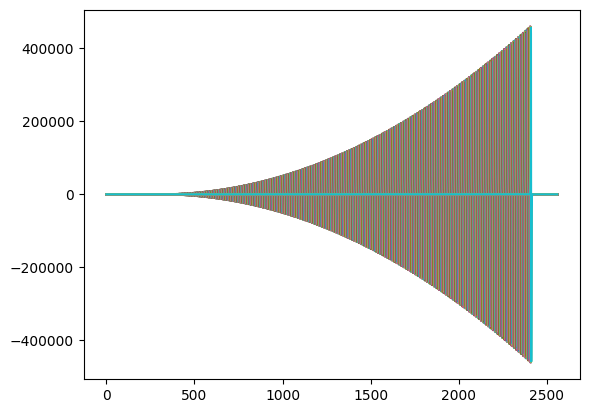

In [8]:
for i in range(lt):
    pl.plot(space[:], phi1[i,:])
# pl.plot(radius[:], field[1,:])
# pl.plot(radius[:], field[lt-1,:])
# pl.xlim(100,1000)

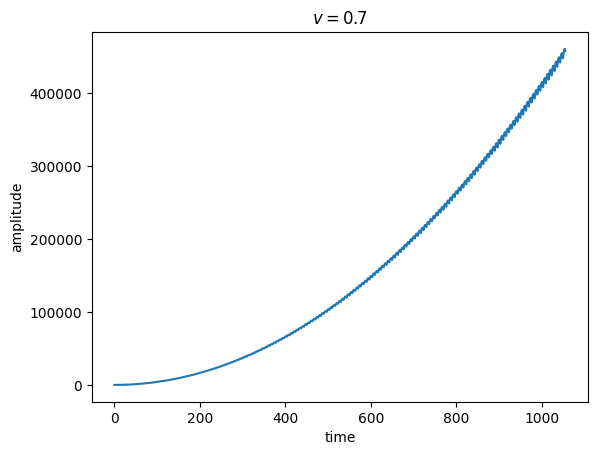

In [9]:
amp1 = np.array([ np.max(np.abs( phi1[i, :] )) for i in range(lt) ])
    
pl.plot(time[:lt], amp1)
# pl.xlim(0,50)
pl.xlabel('time')
pl.ylabel('amplitude')
pl.title(r'$v = 0.7$')
pl.show()

\begin{equation}
	\large x_c = x_0 + v (t - t_0), \qquad u = \frac{\sqrt{v}}{2} (x - x_c), \qquad \varphi ^{(0)} = \frac{v}{2} \text{sech} ^2 u
\end{equation}

In [10]:
def xc(t):
    return x0 + v*(t - t0)

def u(t, x):
    return (np.sqrt(v)/2) * (x - xc(t))

def soliton(t, x):
    return (v/2) * np.cosh(u(t, x))**(-2)

(250.0, 325.0)

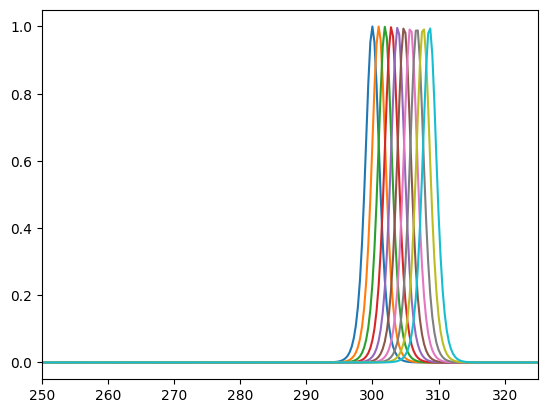

In [69]:
# pl.plot(space, soliton(0, space))
for i in range(10):
    pl.plot(space, soliton(time[i], space))
pl.xlim(250.0, 325.0)

\begin{equation}
    \large \lambda = (\lambda ^1 , \lambda ^2) = (x_c , v) ; \qquad \beta ^{(0)} = ( v , 0 )
\end{equation}

\begin{equation}
    \large \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1} = \frac{\partial \varphi ^{(0)}}{\partial x_c} = \frac{v^{3/2}}{2} \text{sech}^2 u \tanh u , \qquad \frac{\partial \varphi ^{(0)}}{\partial \lambda ^2} = \frac{\partial \varphi ^{(0)}}{\partial v} = \frac{1}{2} \text{sech}^2 u [1 - u \tanh u]
\end{equation}

In [12]:
def phi0_1(t, x):
    return (v**(3/2)/2) * np.cosh(u(t, x))**(-2) * np.tanh(u(t, x))

def phi0_2(t, x):
    return (1/2) * np.cosh(u(t, x))**(-2) * (1 - u(t, x) * np.tanh(u(t, x)))

(250.0, 450.0)

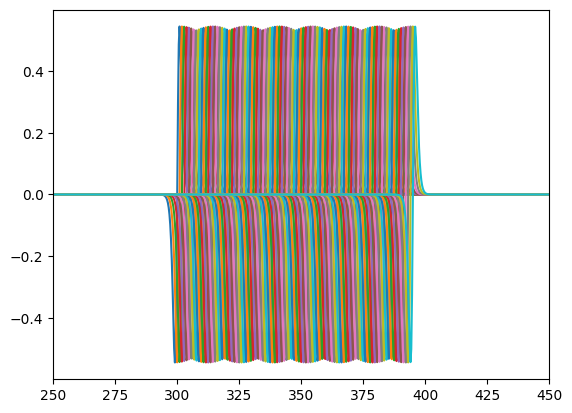

In [13]:
for i in range(100):
    pl.plot(space, phi0_1(time[i], space))
pl.xlim(250.0, 450.0)

(250.0, 450.0)

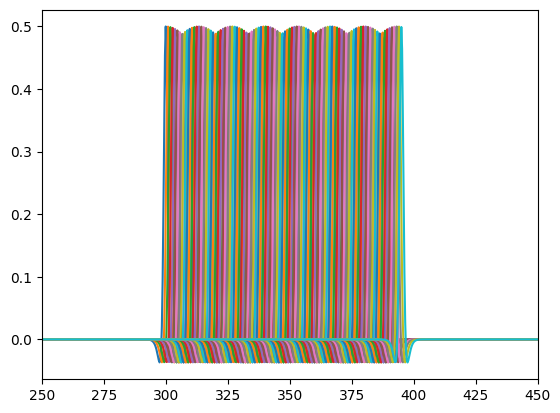

In [14]:
for i in range(100):
    pl.plot(space, phi0_2(time[i], space))
pl.xlim(250.0, 450.0)

\begin{gather}
    \large e^{(0)}_1 = (t - t_0) \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1}, \qquad e^{(0)}_2 = \frac{1}{2} (t - t_0)^2 \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1} + (t - t_0) \frac{\partial \varphi ^{(0)}}{\partial \lambda ^2}, \\
    \large e^{(1)}_1 = \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1}, \qquad e^{(1)}_2 = (t - t_0) \frac{\partial \varphi ^{(0)}}{\partial \lambda ^1} + \frac{\partial \varphi ^{(0)}}{\partial \lambda ^2}
\end{gather}

In [15]:
def e0_1(ti): # ti: time index
    return (time[ti] - t0) * phi0_1(time[ti], space)
    
def e0_2(ti):
    return 0.5 * (time[ti] - t0)**2 * phi0_1(time[ti], space) + (time[ti] - t0) * phi0_2(time[ti], space)

def e1_1(ti):
    return phi0_1(time[ti], space)

def e1_2(ti):
    return (time[ti] - t0) * phi0_1(time[ti], space) + phi0_2(time[ti], space)

(250.0, 450.0)

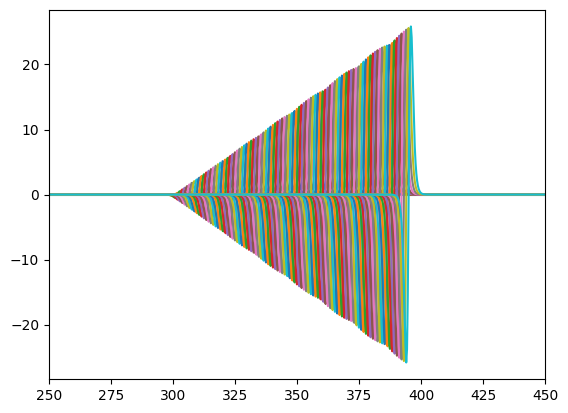

In [16]:
for i in range(100):
    pl.plot(space, e0_1(i))
pl.xlim(250.0, 450.0)

(250.0, 450.0)

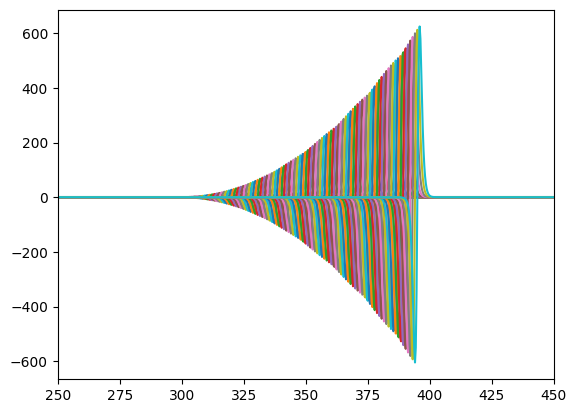

In [17]:
for i in range(100):
    pl.plot(space, e0_2(i))
pl.xlim(250.0, 450.0)

(250.0, 450.0)

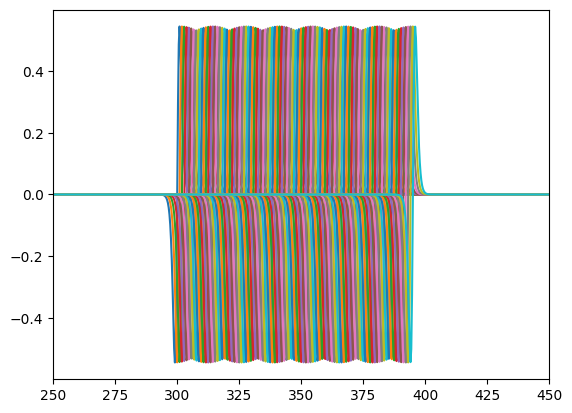

In [18]:
for i in range(100):
    pl.plot(space, e1_1(i))
pl.xlim(250.0, 450.0)

(250.0, 450.0)

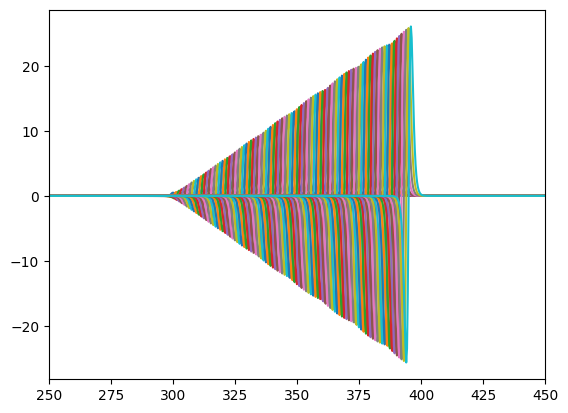

In [19]:
for i in range(100):
    pl.plot(space, e1_2(i))
pl.xlim(250.0, 450.0)

In [20]:
# def integration(f):
#     # N = ls
#     return (np.pi/(2.0 * ls * ell)) * np.sum(np.array([ (ell**2 + radius[i]**2) * f[i] for i in range(ls) ]))

def integration(f): # T: time index, total time
    return integrate.simpson(f, space)

In [21]:
# test
integration(np.exp(-space))

1.0011356297499014

\begin{equation}
    \large M ^{(\mu )(\nu )}_{ij} = \int dt \, dx \, e^{(\mu )}_i e^{(\nu )}_j = \int dt \, m ^{(\mu )(\nu )}_{ij}
\end{equation}

In [22]:
# mu = nu = 0
# ti: time index

# def m00_11(ti):
#     f = e01_1(ti) * e01_1(ti) + e02_1(ti) * e02_1(ti)
#     return integration(f)

# def m00_12(ti):
#     f = e01_1(ti) * e01_2(ti) + e02_1(ti) * e02_2(ti)
#     return integration(f)

# def m00_21(ti):
#     f = e01_2(ti) * e01_1(ti) + e02_2(ti) * e02_1(ti)
#     return integration(f)

def m00_22(ti):
    f = e0_2(ti) * e0_2(ti)
    return integration(f)

# mu = 0, nu = 1

# def m01_11(ti):
#     f = e01_1(ti) * e11_1(ti) + e02_1(ti) * e12_1(ti)
#     return integration(f)

# def m01_12(ti):
#     f = e01_1(ti) * e11_2(ti) + e02_1(ti) * e12_2(ti)
#     return integration(f)

def m01_21(ti):
    f = e0_2(ti) * e1_1(ti)
    return integration(f)

def m01_22(ti):
    f = e0_2(ti) * e1_2(ti)
    return integration(f)

# mu = 1, nu = 0

# def m10_11(ti):
#     f = e11_1(ti) * e01_1(ti) + e12_1(ti) * e02_1(ti)
#     return integration(f)

def m10_12(ti):
    f = e1_1(ti) * e0_2(ti)
    return integration(f)

# def m10_21(ti):
#     f = e11_2(ti) * e01_1(ti) + e12_2(ti) * e02_1(ti)
#     return integration(f)

def m10_22(ti):
    f = e1_2(ti) * e0_2(ti)
    return integration(f)

# mu = 1, nu = 1

def m11_11(ti):
    f = e1_1(ti) * e1_1(ti)
    return integration(f)

def m11_12(ti):
    f = e1_1(ti) * e1_2(ti)
    return integration(f)

def m11_21(ti):
    f = e1_2(ti) * e1_1(ti)
    return integration(f)

def m11_22(ti):
    f = e1_2(ti) * e1_2(ti)
    return integration(f)

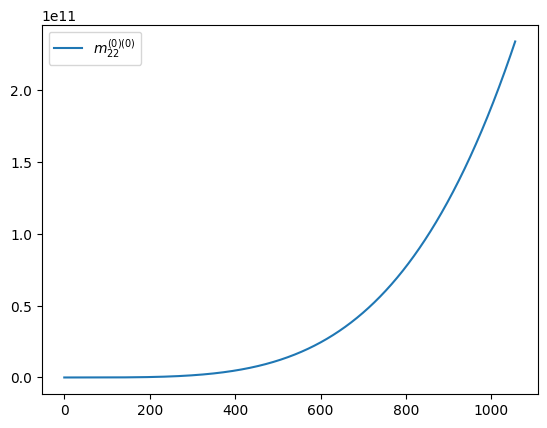

In [23]:
T = 2200
pl.plot(time[:T], [ m00_22(i) for i in range(T) ], label=r'$m^{(0)(0)}_{22}$')
pl.legend()

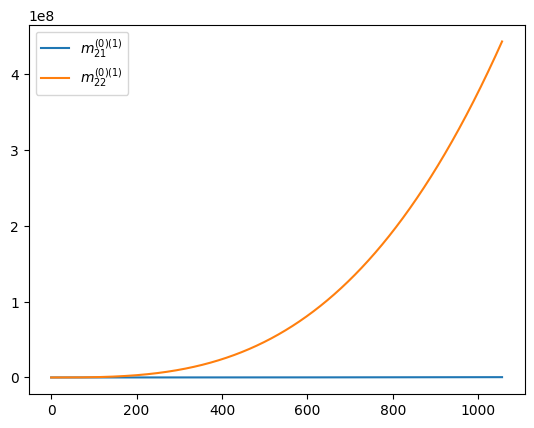

In [24]:
pl.plot(time[:T], [ m01_21(i) for i in range(T) ], label=r'$m^{(0)(1)}_{21}$')
pl.plot(time[:T], [ m01_22(i) for i in range(T) ], label=r'$m^{(0)(1)}_{22}$')
pl.legend()

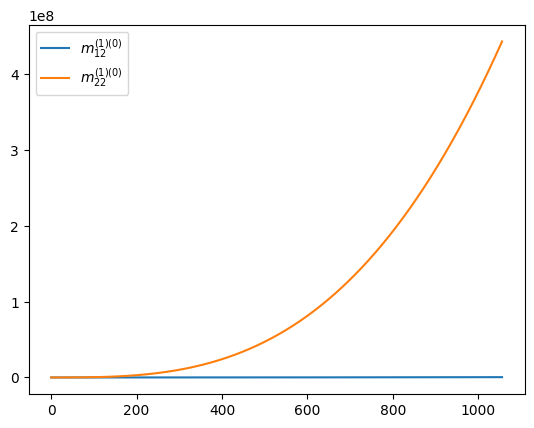

In [25]:
pl.plot(time[:T], [ m10_12(i) for i in range(T) ], label=r'$m^{(1)(0)}_{12}$')
pl.plot(time[:T], [ m10_22(i) for i in range(T) ], label=r'$m^{(1)(0)}_{22}$')
pl.legend()

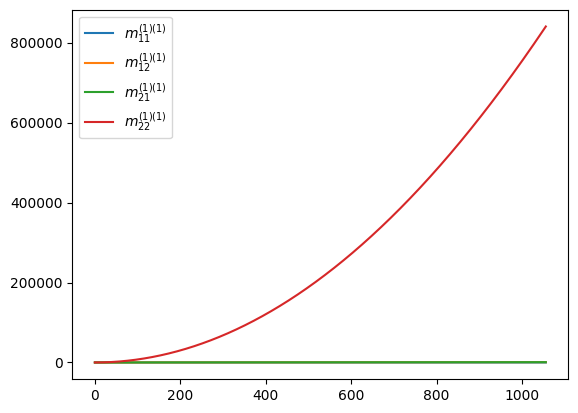

In [26]:
pl.plot(time[:T], [ m11_11(i) for i in range(T) ], label=r'$m^{(1)(1)}_{11}$')
pl.plot(time[:T], [ m11_12(i) for i in range(T) ], label=r'$m^{(1)(1)}_{12}$')
pl.plot(time[:T], [ m11_21(i) for i in range(T) ], label=r'$m^{(1)(1)}_{21}$')
pl.plot(time[:T], [ m11_22(i) for i in range(T) ], label=r'$m^{(1)(1)}_{22}$')
pl.legend()

In [27]:
integrate.simpson([ m00_22(i) for i in range(T) ], time[:T])

49410260452516.55

\begin{equation}
    \large M ^{(\mu) (\nu)}_{ij}= \begin{pmatrix}
    M ^{(0) (0)}_{22} & M ^{(0)(1)}_{21} & M ^{(0)(1)}_{22} \\
    M ^{(1) (0)}_{12} & M ^{(1)(1)}_{11} & M ^{(1)(1)}_{12} \\
    M ^{(1) (0)}_{22} & M ^{(1)(1)}_{21} & M ^{(1)(1)}_{22}
    \end{pmatrix}
\end{equation}

In [28]:
def time_integration(u, T): # T: time index, total time
    return integrate.simpson([ u(i) for i in range(T) ], time[:T])

In [29]:
# def M(T): # T: time index, total time
#     return np.array([[time_integration(m00_11, T), time_integration(m00_12, T), time_integration(m01_11, T), time_integration(m01_12, T)],
#                      [time_integration(m00_21, T), time_integration(m00_22, T), time_integration(m01_21, T), time_integration(m01_22, T)],
#                      [time_integration(m10_11, T), time_integration(m10_12, T), time_integration(m11_11, T), time_integration(m11_12, T)],
#                      [time_integration(m10_21, T), time_integration(m10_22, T), time_integration(m11_21, T), time_integration(m11_22, T)]])

def M(T): # T: time index, total time
    return np.array([[time_integration(m00_22, T), time_integration(m01_21, T), time_integration(m01_22, T)],
                    [time_integration(m10_12, T), time_integration(m11_11, T), time_integration(m11_12, T)],
                    [time_integration(m10_22, T), time_integration(m11_21, T), time_integration(m11_22, T)]])

In [30]:
A = M(100)

In [31]:
np.linalg.matrix_rank(A)

3

In [32]:
print(np.linalg.inv(A))

[[ 3.89630578e-06  7.33202948e-04 -9.25762252e-05]
 [ 7.33202948e-04  2.49390359e-01 -2.09359103e-02]
 [-9.25762252e-05 -2.09359103e-02  2.34754917e-03]]


In [33]:
print(np.matmul(A, np.linalg.inv(A)))

[[ 1.00000000e+00 -7.49262393e-14  9.48063732e-14]
 [ 4.57019204e-18  1.00000000e+00  3.42117894e-16]
 [ 3.37203210e-16  7.28187260e-14  1.00000000e+00]]


In [34]:
for tt in [100, 200, 300, 400]:
    print(M(tt))

[[9.14953795e+06 1.34893802e+04 4.81115435e+05]
 [1.34893802e+04 3.58418285e+01 8.51601846e+02]
 [4.81115435e+05 8.51601846e+02 2.69936458e+04]]
[[2.99976480e+08 1.09558340e+05 7.85018903e+06]
 [1.09558340e+05 7.20456957e+01 3.44090243e+03]
 [7.85018903e+06 3.44090243e+03 2.19146602e+05]]
[[2.29670001e+09 3.71620583e+05 4.00044664e+07]
 [3.71620583e+05 1.08249563e+02 7.76798864e+03]
 [4.00044664e+07 7.76798864e+03 7.43286123e+05]]
[[9.71823045e+09 8.83089819e+05 1.26852768e+08]
 [8.83089819e+05 1.44453430e+02 1.38328605e+04]
 [1.26852768e+08 1.38328605e+04 1.76623963e+06]]


\begin{equation}
    \large V ^{(\nu )}_{i} = \int dt \, dx \, e^{(\nu )}_i \varphi ^{(1)} = \int dt \, v ^{(\nu )}_{i}
\end{equation}

In [35]:
# def v0_1(ti):
#     g = e01_1(ti) * phi1[ti]
#     return integration(g)

def v0_2(ti):
    g = e0_2(ti) * phi1[ti]
    return integration(g)

def v1_1(ti):
    g = e1_1(ti) * phi1[ti]
    return integration(g)

def v1_2(ti):
    g = e1_2(ti) * phi1[ti]
    return integration(g)

In [36]:
# def V(T): # T: time index, total time
#     return np.array([[time_integration(v0_1, T)],
#                      [time_integration(v0_2, T)],
#                      [time_integration(v1_1, T)],
#                      [time_integration(v1_2, T)]])

def V(T): # T: time index, total time
    return np.array([[time_integration(v0_2, T)],
                     [time_integration(v1_1, T)],
                     [time_integration(v1_2, T)]])

In [37]:
for tt in [100, 200, 300, 400]:
    print(V(tt))

[[-13681693.21138256]
 [   -20093.07178603]
 [  -718511.30635692]]
[[-4.52865492e+08]
 [-1.65086812e+05]
 [-1.18438353e+07]]
[[-3.47813465e+09]
 [-5.62087711e+05]
 [-6.05581223e+07]]
[[-1.47402678e+10]
 [-1.33820217e+06]
 [-1.92346845e+08]]


\begin{equation}
    \large \psi ^{i (\mu)} = ((M^{-1})^{(\mu)(\nu)})^{ij} V_j^{(\nu)}
\end{equation}

In [38]:
def psi(T): # T: time index, total time
    return np.matmul(np.linalg.inv(M(T)), V(T))

In [59]:
psi(2200)

array([[-1.52378018],
       [ 1.62151257],
       [ 0.52547885]])

In [41]:
TT = [ 2, 100, 250 , 500 , 1000, 1500, 2000, 2200 ] # , 3000, 3500, 4000, 4500, 5000 ]
PP = [ psi(tt) for tt in TT ]

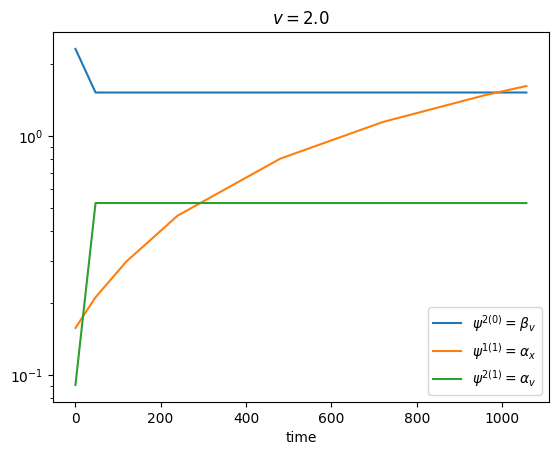

In [60]:
pl.plot(time[TT], np.abs([ PP[i][0, 0] for i in range(len(TT)) ]), label=r'$\psi ^{2(0)} = \beta _v $')
pl.plot(time[TT], np.abs([ PP[i][1, 0] for i in range(len(TT)) ]), label=r'$\psi ^{1(1)} = \alpha _x $')
pl.plot(time[TT], np.abs([ PP[i][2, 0] for i in range(len(TT)) ]), label=r'$\psi ^{2(1)} = \alpha _v $')

pl.legend()
pl.yscale('log')
pl.xlabel('time')
pl.title(r'$v = 2.0$')# , $ T_{max} = 2400$')
pl.savefig('v2.0_abs.png')

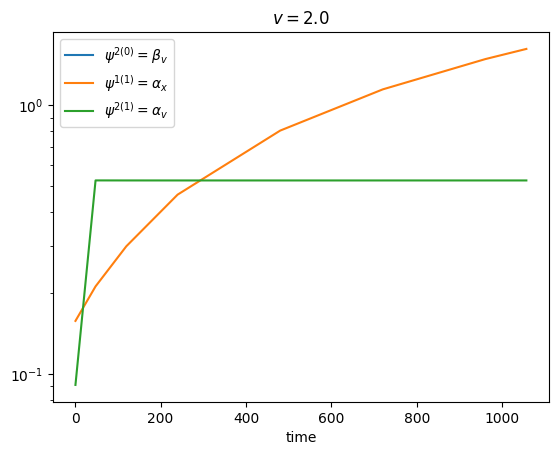

In [51]:
pl.plot(time[TT], [ PP[i][0, 0] for i in range(len(TT)) ], label=r'$\psi ^{2(0)} = \beta _v $')
pl.plot(time[TT], [ PP[i][1, 0] for i in range(len(TT)) ], label=r'$\psi ^{1(1)} = \alpha _x $')
pl.plot(time[TT], [ PP[i][2, 0] for i in range(len(TT)) ], label=r'$\psi ^{2(1)} = \alpha _v $')

pl.legend()
pl.yscale('log')
pl.xlabel('time')
pl.title(r'$v = 2.0$')#, $ T_{max} = 2400$')
pl.savefig('v0-5.png')

\begin{equation}
    \large \varphi ^{(1)} _{\perp} = \varphi ^{(1)} - \psi ^{j (\mu )} e^{(\mu )}_j
\end{equation}

In [53]:
P = PP[-1]
print(P)
T = 20
I = phi1[T] - (P[0][0]*e0_2(T) + P[1][0]*e1_1(T) + + P[2][0]*e1_2(T))

[[-1.52378018]
 [ 1.62151257]
 [ 0.52547885]]


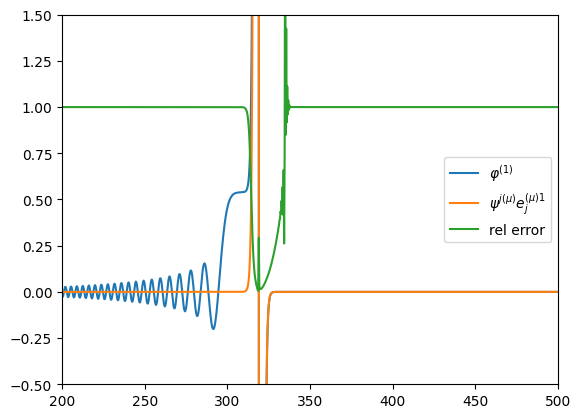

In [58]:
pl.plot(space, phi1[T], label=r'$\varphi ^{(1)} $')
pl.plot(space, P[0][0]*e0_2(T) + P[1][0]*e1_1(T) + + P[2][0]*e1_2(T), label=r'$\psi ^{j (\mu )} e^{(\mu ) 1}_j$')
pl.plot(space, np.abs(I/phi1[T]), label=r'rel error')
pl.ylim(-0.5, 1.5)

# pl.plot(space, I, label=r'$\varphi ^{(1) 1} _{\perp}$')
pl.legend()
pl.xlim(200, 500)
pl.savefig('1.png')